# Link prediction

This notebook illustrates the prediction of links of a graph by nearest neighbors in the embedding space. Most links are supposed to be actual edges of the graph.

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np

In [3]:
from sknetwork.data import karate_club, painters, movie_actor
from sknetwork.linkpred import NNLinker
from sknetwork.embedding import Spectral
from sknetwork.visualization import svg_graph, svg_bigraph

## Graphs

In [14]:
graph = karate_club(metadata=True)
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

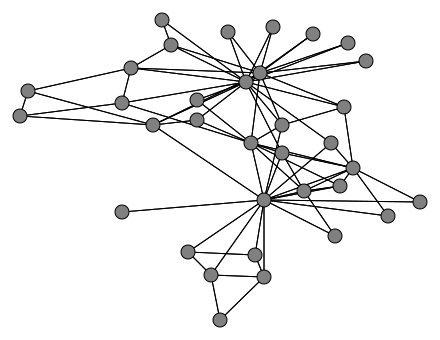

In [15]:
image = svg_graph(adjacency, position)
SVG(image)

In [22]:
linker = NNLinker(n_neighbors=3)
links = linker.fit_predict(adjacency)

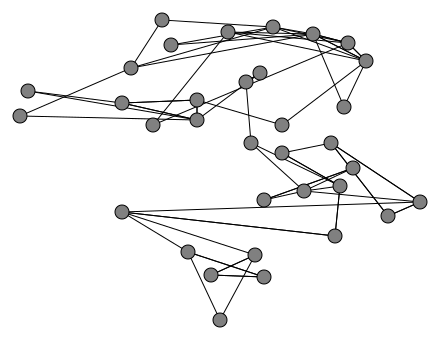

In [23]:
image = svg_graph(links, position, directed=False, display_edge_weight=False)
SVG(image)

In [27]:
linker = NNLinker(threshold=0.5)
links = linker.fit_predict(adjacency)

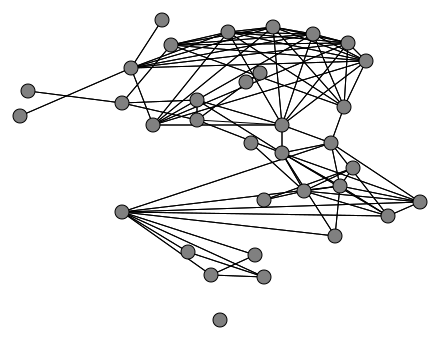

In [29]:
image = svg_graph(links, position, directed=False, display_edge_weight=False)
SVG(image)

In [32]:
# Nearest neighbors in embedding space
linker = NNLinker(n_neighbors=5, threshold=0.5, embedding_method=Spectral(2))
links = linker.fit_predict(adjacency)

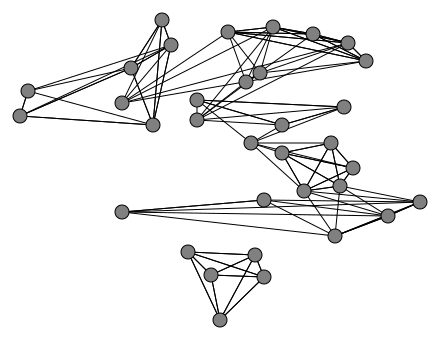

In [35]:
image = svg_graph(links, position, directed=False, display_edge_weight=False)
SVG(image)

## Directed graphs

In [36]:
graph = painters(metadata=True)
adjacency = graph.adjacency
position = graph.position
names = graph.names

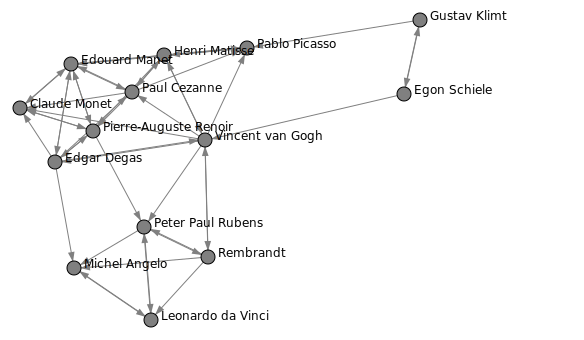

In [37]:
image = svg_graph(adjacency, position, names)
SVG(image)

In [39]:
linker = NNLinker(embedding_method=Spectral(3))
links = linker.fit_predict(adjacency)

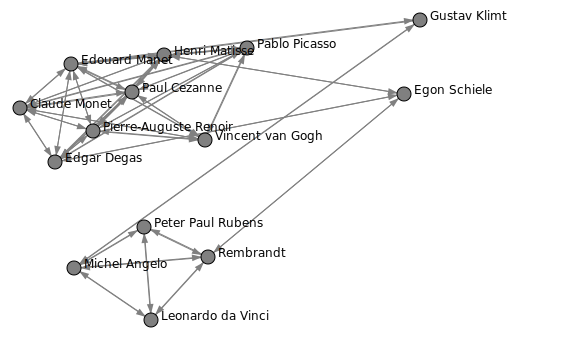

In [43]:
image = svg_graph(links, position, names, directed=True, display_edge_weight=False)
SVG(image)

## Bipartite graphs

In [45]:
graph = movie_actor(metadata=True)
biadjacency = graph.biadjacency
names_row = graph.names_row
names_col = graph.names_col

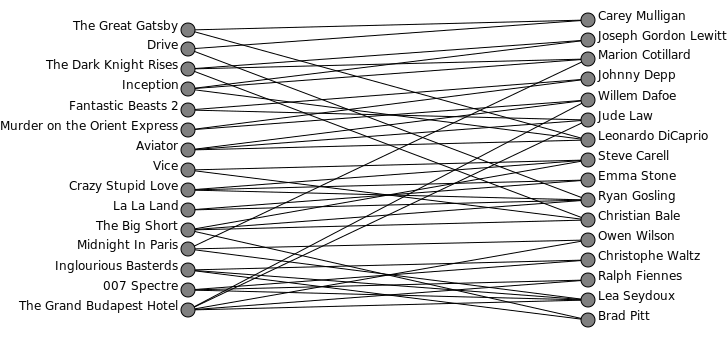

In [48]:
image = svg_bigraph(biadjacency, names_row, names_col)
SVG(image)

In [51]:
linker = NNLinker(n_neighbors=5, threshold=0.5, embedding_method=Spectral(3))
links = linker.fit_predict(biadjacency)

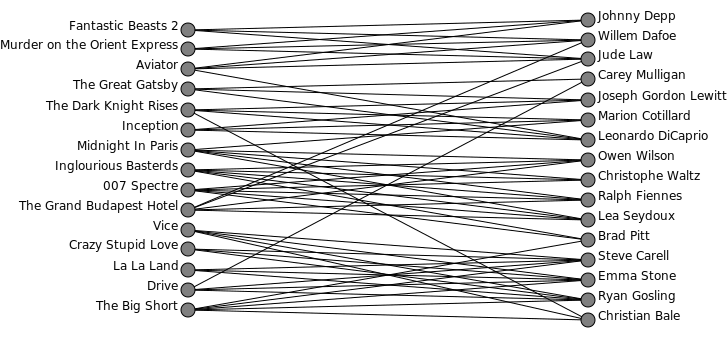

In [52]:
image = svg_bigraph(links, names_row, names_col, display_edge_weight=False)
SVG(image)
